# Pymaceuticals Inc.
---

### Analysis

In reviewing the mouse study data I made the following obersvations: 

-The weight of the mouse has a positive correlation to the size of the tumor.  Larger mice showed larger tumors vs. smaller mice and smaller tumors.

-Capomulin and Ramicine have the lowest average tumor volume with Capomulin at 40.6 and Ramicine at 40.2 which indicates these drug regimines were the most successful in treating the tumor.

-Ketrapil has the large average tumor volume which would indicate it was the least succesful drug regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_data = mouse_study_combined_df['Mouse ID'].unique()
number_of_mice = len(mouse_data)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_combined_df[mouse_study_combined_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study_combined_df.loc[mouse_study_combined_df['Mouse ID'] == duplicate_mice_id[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


# Checking the number of mice in the clean DataFrame.
clean_mouse_data = clean_mouse_study_df['Mouse ID'].unique()
clean_number_of_mice = len(clean_mouse_data)
clean_number_of_mice

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_data = clean_mouse_study_df.set_index(['Drug Regimen'])
group_drug_data = drug_regimen_data.groupby('Drug Regimen')
drug_regimen_mean = group_drug_data['Tumor Volume (mm3)'].mean()
drug_regimen_median = group_drug_data['Tumor Volume (mm3)'].median()
drug_regimen_var = group_drug_data['Tumor Volume (mm3)'].var()
drug_regimen_std = group_drug_data['Tumor Volume (mm3)'].std()
drug_regimen_sem = group_drug_data['Tumor Volume (mm3)'].sem()

drug_regimen_summary = pd.DataFrame({
    'Mean Tumor Volume': drug_regimen_mean,
    'Median Tumor Volume': drug_regimen_median,
    'Tumor Volume Variance': drug_regimen_var,
    'Tumor Volume Std. Dev.': drug_regimen_std,
    'Tumor Volume Std. Err.': drug_regimen_sem
})

drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_drug_regimen_summary = drug_regimen_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean","median","var","std","sem"])
aggregate_drug_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

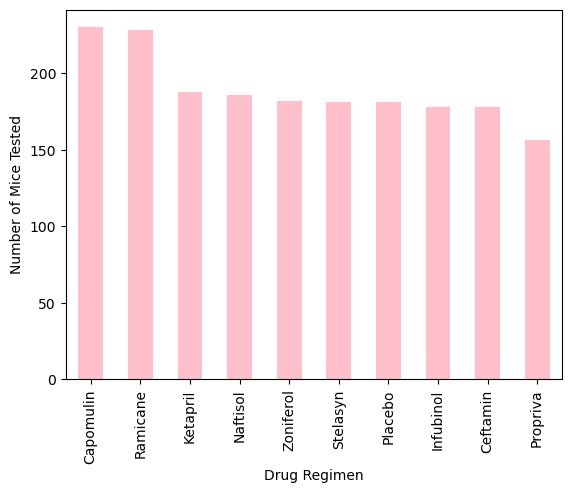

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_mice_data = clean_mouse_study_df[['Drug Regimen','Timepoint']]

count_per_drug = drug_mice_data['Drug Regimen'].value_counts()
count_per_drug

count_per_drug.plot(kind='bar', color='pink',
                   xlabel = 'Drug Regimen',
                   ylabel='Number of Mice Tested')

plt.show()

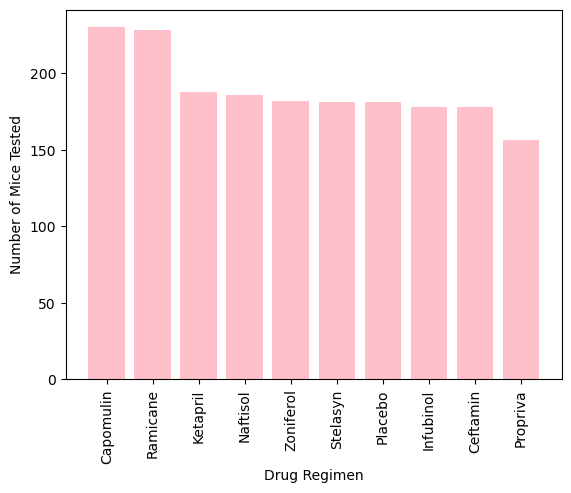

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = count_per_drug.index.values
count = count_per_drug.values

plt.bar(drug_regimen, count, color='pink')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


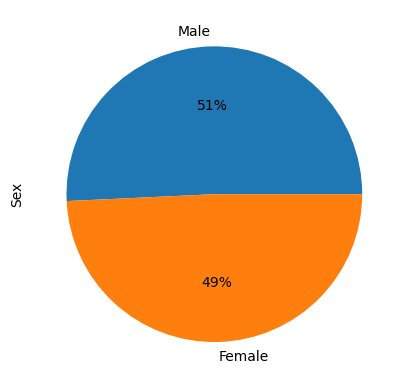

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_mouse_study_df['Sex'].value_counts()
Sex = ['Female', 'Male']

female_vs_male.plot(kind = 'pie', autopct = '%1.0f%%', ylabel = 'Sex')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

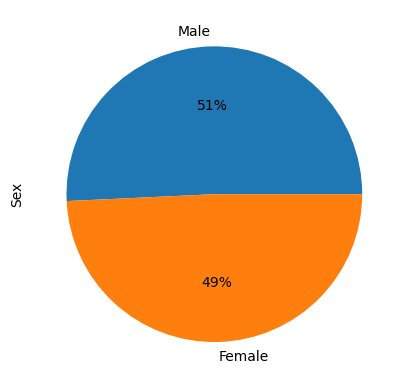

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = female_vs_male.index.values
count = female_vs_male.values

plt.ylabel('Sex')
plt.pie(count, labels = label, autopct = '%1.0f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = clean_mouse_study_df.groupby('Mouse ID')
greatest_time = greatest_time['Timepoint'].max()
greatest_time_df = pd.DataFrame(greatest_time)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(clean_mouse_study_df, greatest_time_df, on = ['Mouse ID', 'Timepoint'], how='right')
tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_capomulin = []
tumor_volume_ramicane = []
tumor_volume_infubinol = []
tumor_volume_ceftamin = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset
     
    # Determine outliers using upper and lower bounds
for e in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[e, 'Drug Regimen'] == 'Capomulin':
        tumor_volume_capomulin.append(tumor_volume_df.loc[e, 'Tumor Volume (mm3)'])
    if tumor_volume_df.loc[e, 'Drug Regimen'] == 'Ramicane':
        tumor_volume_ramicane.append(tumor_volume_df.loc[e, 'Tumor Volume (mm3)'])
    if tumor_volume_df.loc[e, 'Drug Regimen'] == 'Infubinol':
        tumor_volume_infubinol.append(tumor_volume_df.loc[e, 'Tumor Volume (mm3)'])
    if tumor_volume_df.loc[e, 'Drug Regimen'] == 'Ceftamin':
        tumor_volume_ceftamin.append(tumor_volume_df.loc[e, 'Tumor Volume (mm3)'])

tumor_volume=[tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftamin]
        
outlier = []
for e in range(len(tumor_volume)):
# Copied below data and syntaxes from matplotlib class day 3, activity 2
    quartiles = pd.Series(tumor_volume[e]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[e]}:")

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
      
for g in range(len(tumor_volume[e])):
    if (tumor_volume[e][g] < lower_bound) or (tumor_volume[e][g] > upper_bound):
        the_outlier = tumor_volume[e][g]
        outlier.append(the_outlier)
        print(f"The outliers are {outlier}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

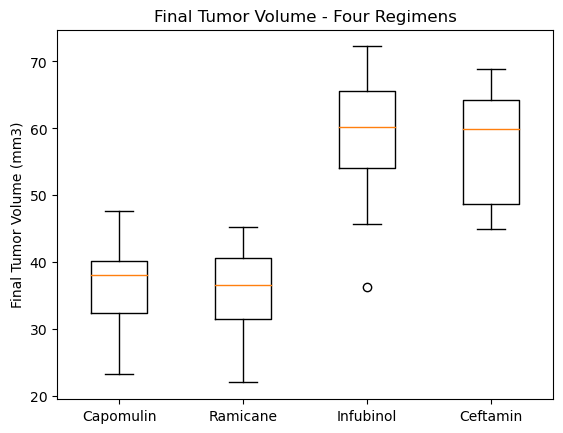

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume - Four Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

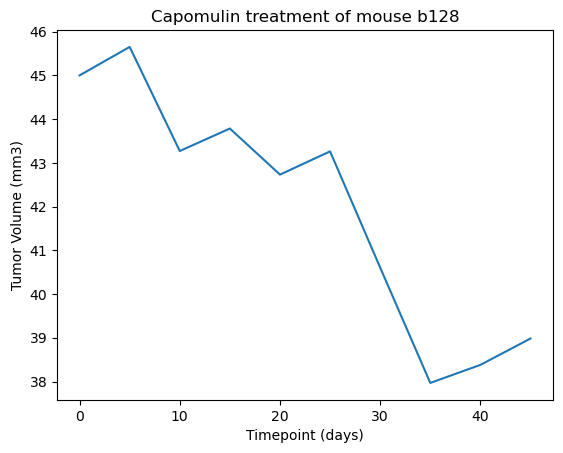

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_study_df['Mouse ID'] == 'b128')]
reduced_capomulin_df = capomulin_df[['Timepoint','Tumor Volume (mm3)']]
reduced_capomulin_df = reduced_capomulin_df.set_index(['Timepoint'])


timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

plt.plot(timepoint, tumor_vol)
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

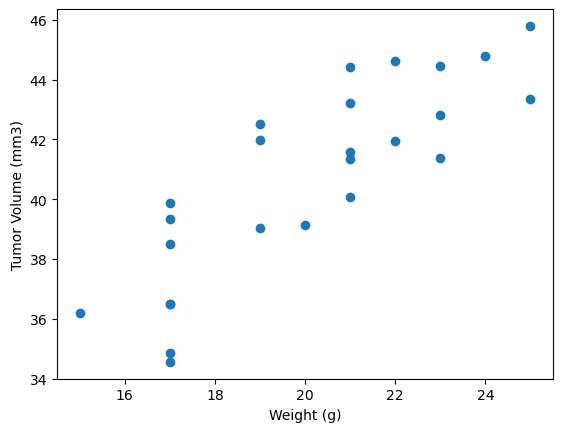

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_cap_df = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == 'Capomulin')]
group_cap_df = new_cap_df.groupby('Mouse ID')

#find and store avg tumor vol for each weight
avg_tumor_vol = group_cap_df[('Tumor Volume (mm3)')].mean()
weight = group_cap_df['Weight (g)'].mean()
avg_cap_df = pd.DataFrame({'Weight (g)': weight,
                            'Tumor Volume (mm3)': avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


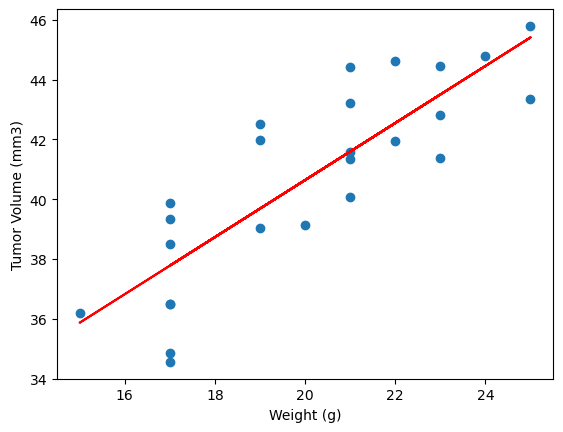

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol)

print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

x_values=avg_cap_df ['Weight (g)']
y_values=avg_cap_df ['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()